# **Machine Learning Project**

Title: Rainfall Predicition

Porpuse: Predict whether tomorrow will be rain or not based on several factors from the day before.

Team members:  Dawoud Tormos, Ghandi Mahmoud


### Downloading dataset

In [1]:
# File ID of the file on my own google drive
file_id = "1M0ZziWDTjN-xN0lYXBV4ZkQQ2jKG3gAj" # google driveId of the dataset on my drive

#downloading the dataset file
!wget "https://drive.google.com/uc?id={file_id}" -O weatherDatasetAUS.csv

--2025-01-08 21:41:28--  https://drive.google.com/uc?id=1M0ZziWDTjN-xN0lYXBV4ZkQQ2jKG3gAj
Resolving drive.google.com (drive.google.com)... 173.194.212.101, 173.194.212.113, 173.194.212.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M0ZziWDTjN-xN0lYXBV4ZkQQ2jKG3gAj [following]
--2025-01-08 21:41:28--  https://drive.usercontent.google.com/download?id=1M0ZziWDTjN-xN0lYXBV4ZkQQ2jKG3gAj
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14094055 (13M) [application/octet-stream]
Saving to: ‘weatherDatasetAUS.csv’

weatherDatasetAUS.c 100%[===================>]  13.44M  67.2MB/s    in 0.2s    

2025-01-08 21:41:3

[link text](https://)## Source & Acknowledgements

The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.
For example, you can check the latest weather observations in Canberra here: Canberra Weather.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

## Loading Dataset

In [2]:
import pandas as pd

df = pd.read_csv("./weatherDatasetAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## EDA

In [ ]:
df.shape

(145460, 23)

In [ ]:
print(f"columns: ${len(df.columns)}")

columns: $23


In [ ]:
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

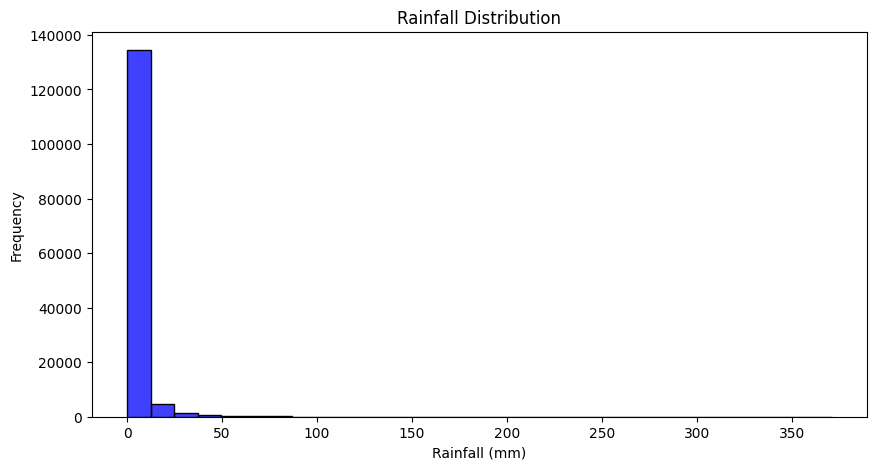

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'].dropna(), kde=False, bins=30, color='blue')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


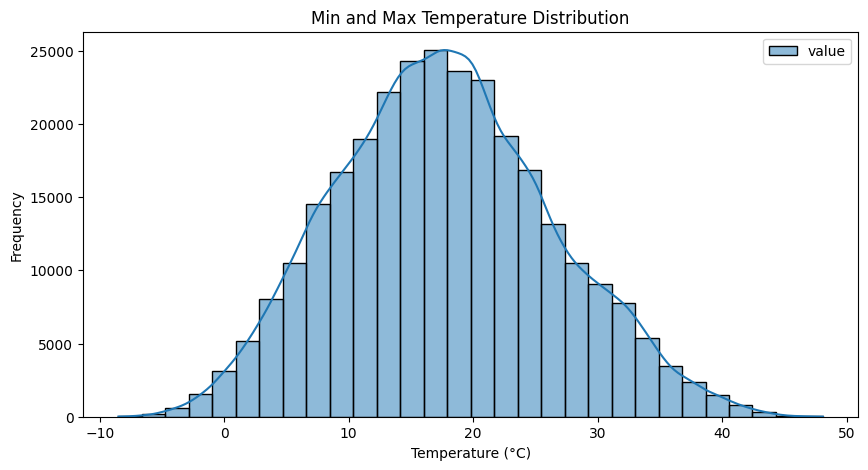

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['MinTemp', 'MaxTemp']].melt(), kde=True, bins=30)
plt.title('Min and Max Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


Sunshine vs. RainTomorrow Visualization

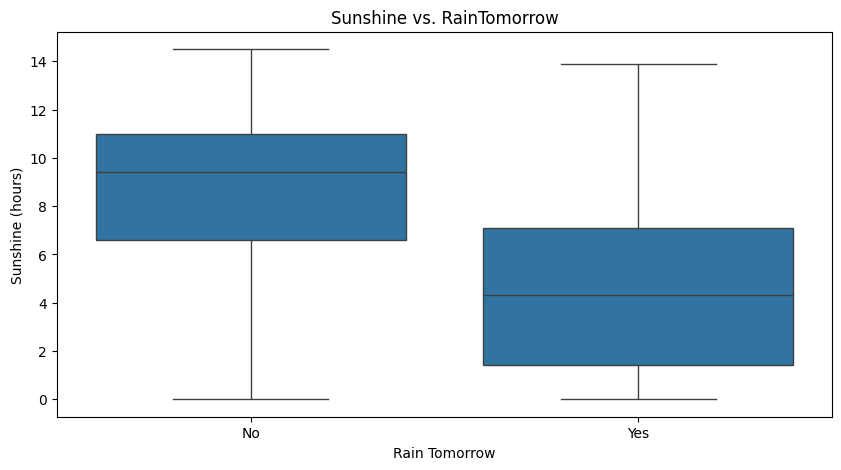

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='RainTomorrow', y='Sunshine')
plt.title('Sunshine vs. RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Sunshine (hours)')
plt.show()

 Wind Gust Direction Count

<ipython-input-99-4e22d4bb4a36>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{float(label.get_text()):.4f}" if label.get_text().replace('.', '').isdigit() else label.get_text() for label in ax.get_xticklabels()])


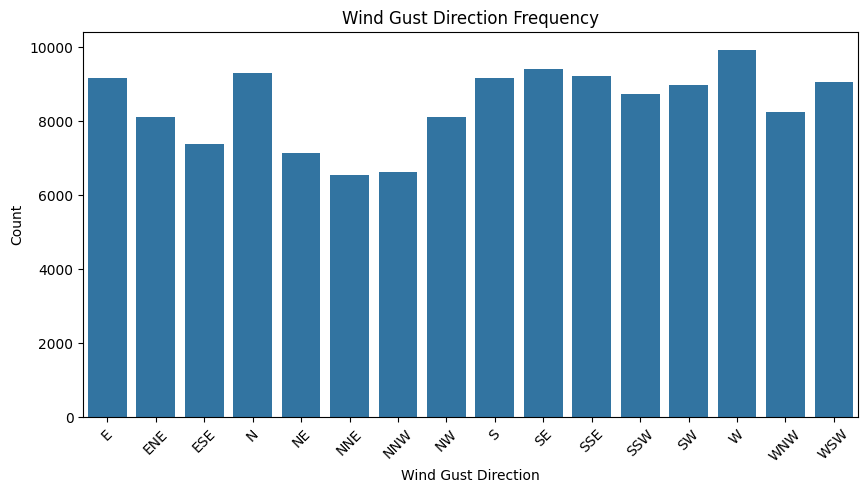

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='WindGustDir', order=df['WindGustDir'].value_counts().sort_index().index)
plt.title('Wind Gust Direction Frequency')
plt.xlabel('Wind Gust Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Rotate and format x-axis ticks to show only 2 digits
plt.xticks(rotation=45)
ax = plt.gca()  # Get current axis
ax.set_xticklabels([f"{float(label.get_text()):.4f}" if label.get_text().replace('.', '').isdigit() else label.get_text() for label in ax.get_xticklabels()])

plt.show()

Wind Speed Distribution (9am and 3pm)

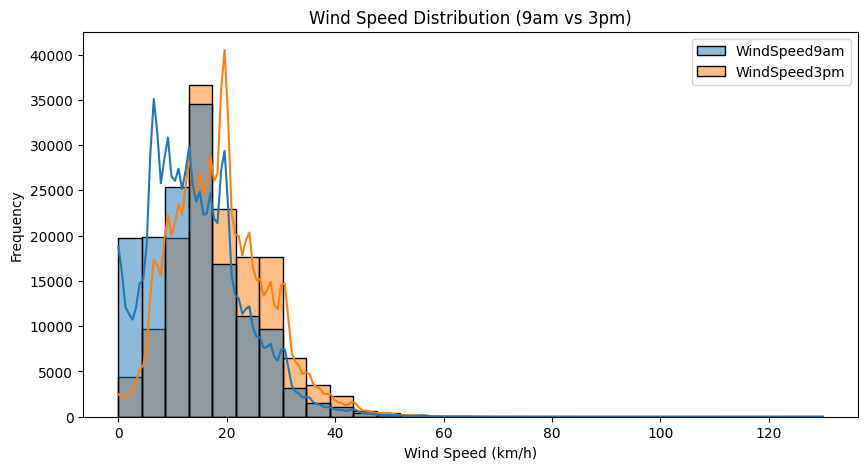

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['WindSpeed9am', 'WindSpeed3pm']], kde=True, bins=30)
plt.title('Wind Speed Distribution (9am vs 3pm)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()


Pressure Distribution (9am and 3pm)

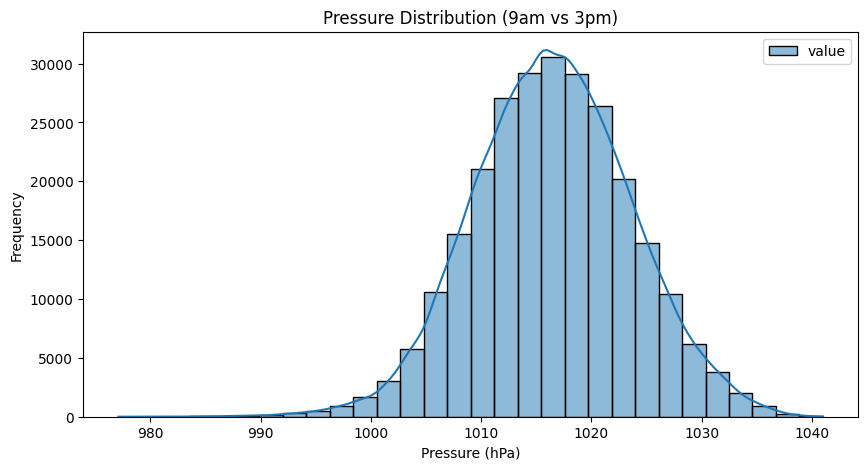

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['Pressure9am', 'Pressure3pm']].melt(), kde=True, bins=30)
plt.title('Pressure Distribution (9am vs 3pm)')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()


Cloud Cover vs RainTomorrow

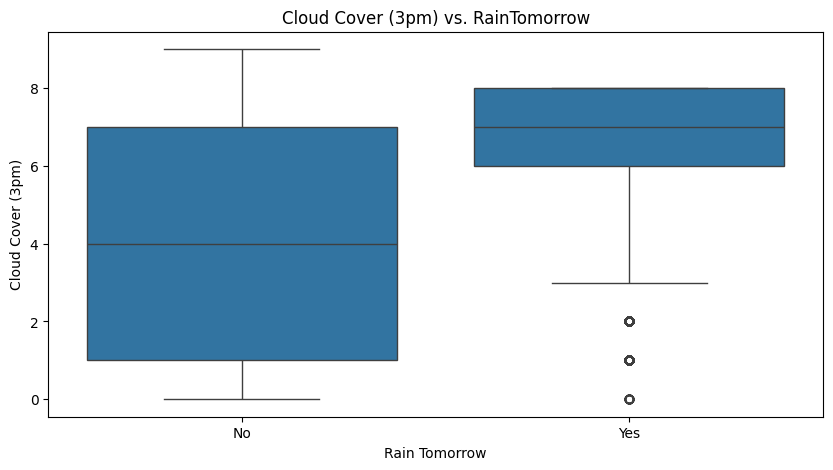

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='RainTomorrow', y='Cloud3pm')
plt.title('Cloud Cover (3pm) vs. RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Cloud Cover (3pm)')
plt.show()


## Dealing with missing values

In [4]:

print("Missing Values by Column:\n")
df.isna().sum()


Missing Values by Column:



,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


 Visualinzing the ammount of missing value




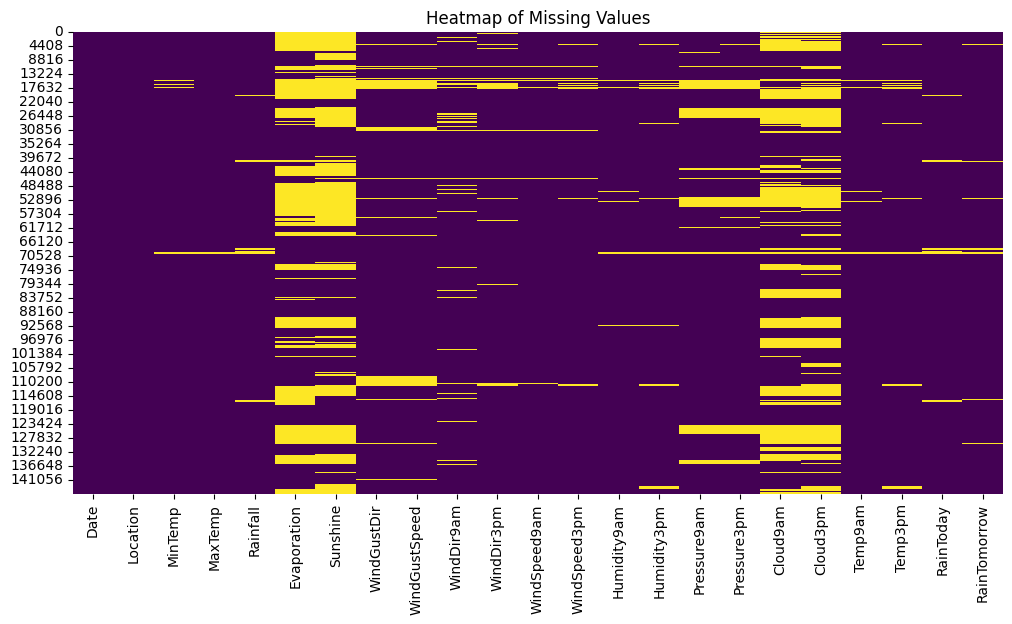

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


Dropping rows with more than 8 missing values:

In [ ]:
# Drop rows with more than 5 missing fields
#df = df[df.isnull().sum(axis=1) <= 8]
#print(f"Remaining rows after dropping rows with > 8 missing fields: {len(df)}")


Remaining rows after dropping rows with > 8 missing fields: 141851


filling missing values:

In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [ ]:
print("Missing Values Remaining:\n", df.isnull().sum().sum())


Missing Values Remaining:
 0


## Label Encoding

Label Encoding is a crucial technique in machine learning for transforming categorical variables into a numerical format that algorithms can process.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to all object (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

print("Categorical columns encoded.")


Categorical columns encoded.


In [ ]:
#print(df.head(15))
df.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,5.466635,7.615778,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.510111,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,5.466635,7.615778,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.448689,4.510111,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,5.466635,7.615778,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.448689,2.000000,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,5.466635,7.615778,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.448689,4.510111,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,5.466635,7.615778,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
5,401,2,14.6,29.7,0.2,5.466635,7.615778,14,56.000000,13,...,55.0,23.0,1009.2,1005.4,4.448689,4.510111,20.6,28.9,0,0
6,402,2,14.3,25.0,0.0,5.466635,7.615778,13,50.000000,12,...,49.0,19.0,1009.6,1008.2,1.000000,4.510111,18.1,24.6,0,0
7,403,2,7.7,26.7,0.0,5.466635,7.615778,13,35.000000,10,...,48.0,19.0,1013.4,1010.1,4.448689,4.510111,16.3,25.5,0,0
8,404,2,9.7,31.9,0.0,5.466635,7.615778,6,80.000000,9,...,42.0,9.0,1008.9,1003.6,4.448689,4.510111,18.3,30.2,0,1
9,405,2,13.1,30.1,1.4,5.466635,7.615778,13,28.000000,8,...,58.0,27.0,1007.0,1005.7,4.448689,4.510111,20.1,28.2,1,0


## Normalization

Normalization is the process of scaling data to fit within a specific range, usually between 0 and 1. It's used to standardize features that have different units or scales, making them comparable.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [9]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.516509,0.523629,0.001617,0.037712,0.524909,0.866667,0.294574,0.866667,...,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0,0.0
1,0.115575,0.041667,0.375000,0.565217,0.000000,0.037712,0.524909,0.933333,0.294574,0.400000,...,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0,0.0
2,0.115866,0.041667,0.504717,0.576560,0.000000,0.037712,0.524909,1.000000,0.310078,0.866667,...,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0,0.0
3,0.116157,0.041667,0.417453,0.620038,0.000000,0.037712,0.524909,0.266667,0.139535,0.600000,...,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0,0.0
4,0.116448,0.041667,0.613208,0.701323,0.002695,0.037712,0.524909,0.866667,0.271318,0.066667,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0
5,0.116739,0.041667,0.544811,0.652174,0.000539,0.037712,0.524909,0.933333,0.387597,0.866667,...,0.55,0.23,0.474380,0.4528,0.494162,0.501103,0.586498,0.658349,0.0,0.0
6,0.117031,0.041667,0.537736,0.563327,0.000000,0.037712,0.524909,0.866667,0.341085,0.800000,...,0.49,0.19,0.480992,0.4976,0.111111,0.501103,0.533755,0.575816,0.0,0.0
7,0.117322,0.041667,0.382075,0.595463,0.000000,0.037712,0.524909,0.866667,0.224806,0.666667,...,0.48,0.19,0.543802,0.5280,0.494162,0.501103,0.495781,0.593090,0.0,0.0
8,0.117613,0.041667,0.429245,0.693762,0.000000,0.037712,0.524909,0.400000,0.573643,0.600000,...,0.42,0.09,0.469421,0.4240,0.494162,0.501103,0.537975,0.683301,0.0,1.0
9,0.117904,0.041667,0.509434,0.659735,0.003774,0.037712,0.524909,0.866667,0.170543,0.533333,...,0.58,0.27,0.438017,0.4576,0.494162,0.501103,0.575949,0.644914,1.0,0.0


## Correlation Map

A Correlation Map visualizes the relationships between variables in a dataset. It shows the strength and direction of correlations between pairs of variables.<br><br>


*   Positive Correlation: Variables move in the same direction (value close to +1).

*   Negative Correlation: Variables move in opposite directions (value close to -1).
*   Negative Correlation: Variables move in opposite directions (value close to -1).
No Correlation: Variables are independent (value close to 0).






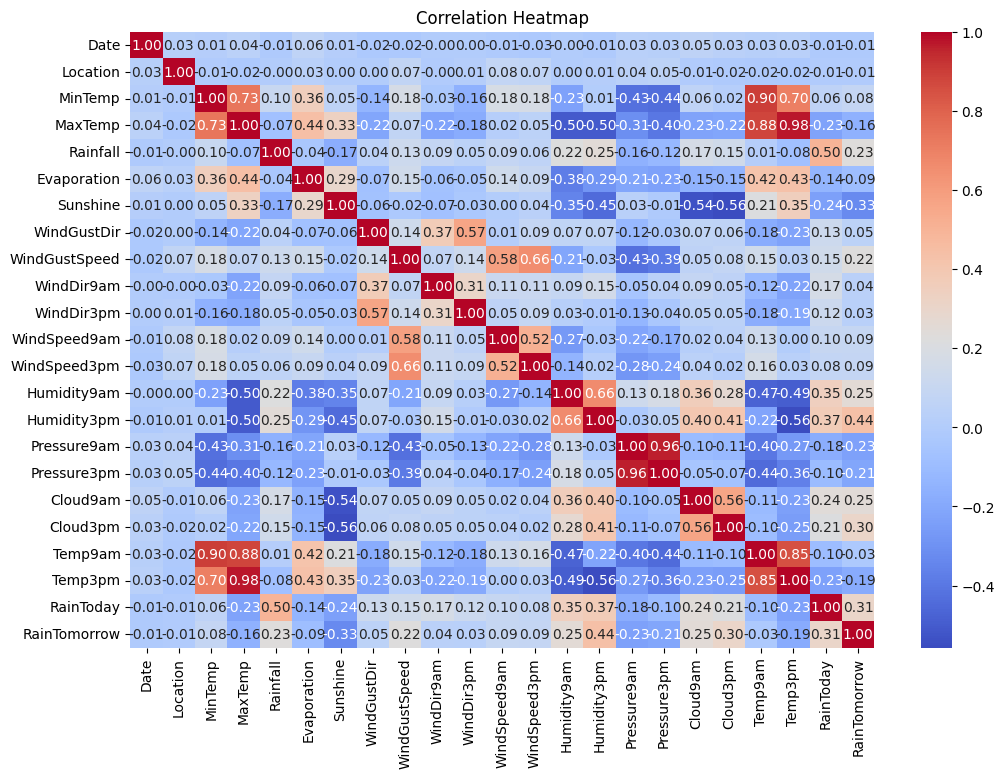

In [ ]:
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Feature Selection

Feature Selection is the process of selecting the most relevant features for use in a model, removing irrelevant or redundant features to improve model performance and reduce overfitting.

For this datase, no Feature extraction is needed as all columns are relevant to the target.

In [ ]:
print(df.describe())

                Date       Location        MinTemp        MaxTemp  \
count  141851.000000  141851.000000  141851.000000  141851.000000   
mean        0.560110       0.497713       0.488382       0.530249   
std         0.256646       0.297998       0.150611       0.134057   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.340611       0.229167       0.379717       0.429112   
50%         0.565939       0.500000       0.483491       0.519849   
75%         0.780495       0.750000       0.596698       0.625709   
max         1.000000       1.000000       1.000000       1.000000   

            Rainfall    Evaporation       Sunshine    WindGustDir  \
count  141851.000000  141851.000000  141851.000000  141851.000000   
mean        0.006310       0.037701       0.525226       0.533587   
std         0.022536       0.021994       0.189764       0.312730   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0275

## Training different models

Below we will train different models and see their accurracies.<br>
Models:


*   K-Nearest Neighbors (KNN)
*   Logistic Regression
*   Decicion Tree Classifier
*   Random Forest Classifier
*   Naive Bayes NB





Splitting Dataset between train and test

In [10]:
from sklearn.model_selection import train_test_split

#Split data into features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Storing Accuracies to compare Later:

In [11]:
# Initialize lists to store results
models = ['K-Nearest Neighbors','Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = {'K-Nearest Neighbors':[],'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': [], 'Naive Bayes': []}

### Metrics array to record each model's metrics

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize an array to store metrics for each model
models_metrics = []

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score





# Step 3: Train and evaluate KNN for different values of K
k_values = range(1, 25)  # Testing values of K from 1 to 25
accuracies['K-Nearest Neighbors'] = []


for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies['K-Nearest Neighbors'].append(accuracy)
    print(f"K={k}, Accuracy: {accuracy}")



K=1, Accuracy: 0.7975397412851151
K=2, Accuracy: 0.8180183990694724
K=3, Accuracy: 0.8218955976172853
K=4, Accuracy: 0.8264777413556096
K=5, Accuracy: 0.8292270275986042
K=6, Accuracy: 0.8304254344224736
K=7, Accuracy: 0.833773924077403
K=8, Accuracy: 0.833773924077403
K=9, Accuracy: 0.8353952980155793
K=10, Accuracy: 0.8365584575799232
K=11, Accuracy: 0.8371224137323323
K=12, Accuracy: 0.8360297486870396
K=13, Accuracy: 0.8376511226252159
K=14, Accuracy: 0.8365937048394487
K=15, Accuracy: 0.8387437876705086
K=16, Accuracy: 0.8371929082513835
K=17, Accuracy: 0.8377568644037926
K=18, Accuracy: 0.8378273589228438
K=19, Accuracy: 0.8388142821895598
K=20, Accuracy: 0.8378978534418949
K=21, Accuracy: 0.838461809594304
K=22, Accuracy: 0.8371224137323323
K=23, Accuracy: 0.8387790349300341
K=24, Accuracy: 0.8378978534418949


Visualizing different accuracies with different k values:


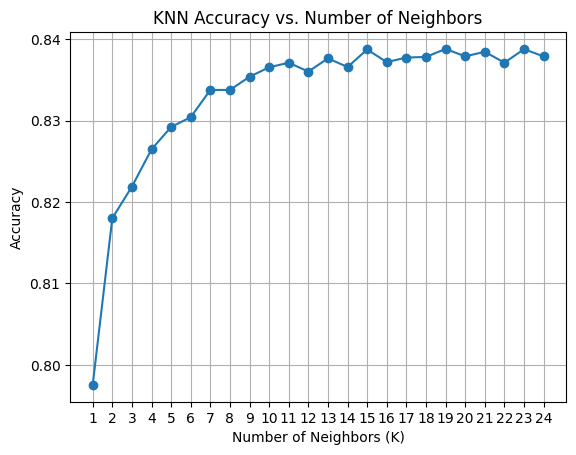

In [ ]:

# Step 4: Visualize the accuracy for different values of K
plt.plot(k_values, accuracies['K-Nearest Neighbors'], marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Best accuracy is that of k = 15

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

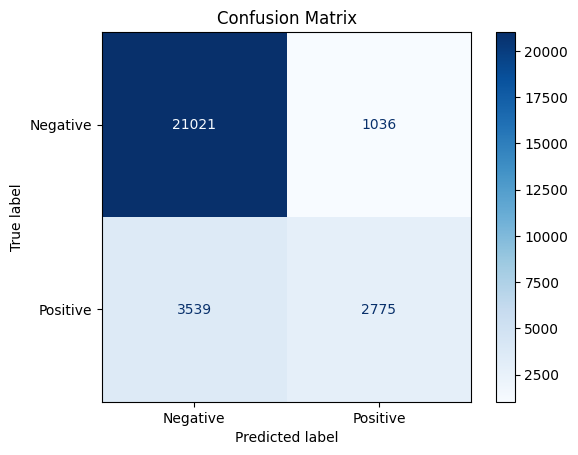

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

Adding metrics to metrics array

In [ ]:
metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()  # Convert to list for storage
    }

models_metrics.append(metrics)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
accuracies['Logistic Regression'].append(accuracy_score(y_test, y_pred))

Accuracy: 0.8426027773958477


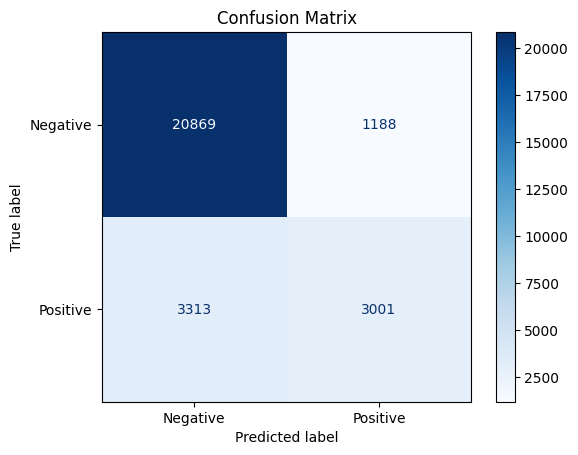

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

Adding metrics to metrics array

In [ ]:
metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()  # Convert to list for storage
    }

models_metrics.append(metrics)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

accuracies['Decision Tree'] = []
# Decision Tree with different max depths
max_depths = range(1, 21)
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_score(y_test, y_pred)}")
    accuracies['Decision Tree'].append(accuracy_score(y_test, y_pred))

Max Depth: 1, Accuracy: 0.8159388107574637
Max Depth: 2, Accuracy: 0.8197102675266998
Max Depth: 3, Accuracy: 0.8291917803390786
Max Depth: 4, Accuracy: 0.8318353248034965
Max Depth: 5, Accuracy: 0.8361707377251418
Max Depth: 6, Accuracy: 0.8369461774347045
Max Depth: 7, Accuracy: 0.8387085404109831
Max Depth: 8, Accuracy: 0.8375453808466392
Max Depth: 9, Accuracy: 0.8374043918085369
Max Depth: 10, Accuracy: 0.8367699411370766
Max Depth: 11, Accuracy: 0.8317648302844454
Max Depth: 12, Accuracy: 0.830566423460576
Max Depth: 13, Accuracy: 0.8270769447675443
Max Depth: 14, Accuracy: 0.8219660921363364
Max Depth: 15, Accuracy: 0.8201684819005323
Max Depth: 16, Accuracy: 0.8154805963836311
Max Depth: 17, Accuracy: 0.8122378485072785
Max Depth: 18, Accuracy: 0.8077966938070565
Max Depth: 19, Accuracy: 0.8040957315568714
Max Depth: 20, Accuracy: 0.7995488350780727


Visualizing different accuracies with different values of max-depth:


In [ ]:
max_depths = range(1, 21)

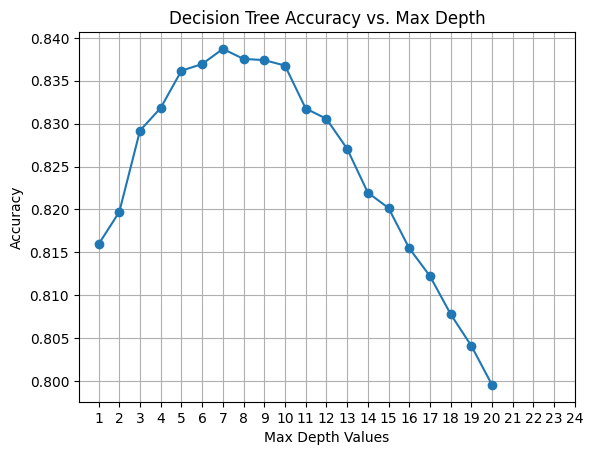

In [ ]:
#Visualize the accuracy for different values of max-depth
plt.plot(max_depths, accuracies['Decision Tree'], marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth Values')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

best accuracy is that of max-depth = 7

In [ ]:
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f"Max Depth: {7}, Accuracy: {accuracy_score(y_test, y_pred)}")


Max Depth: 7, Accuracy: 0.8387085404109831


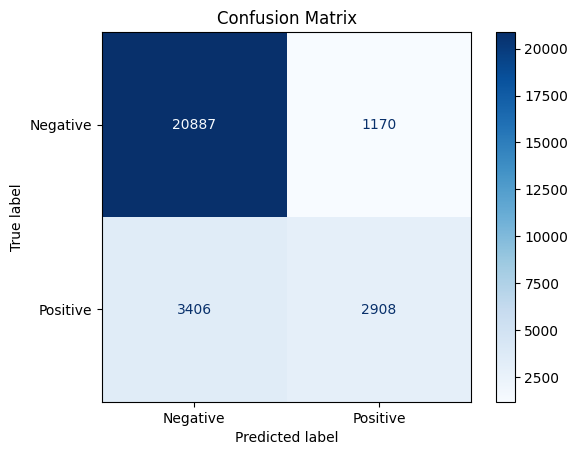

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

Adding metrics to metrics array

In [ ]:
metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()  # Convert to list for storage
    }

models_metrics.append(metrics)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accuracies['Random Forest'] = []
# Random Forest with different max depths
max_depths = range(1, 30)
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_score(y_test, y_pred)}")
    accuracies['Random Forest'].append(accuracy_score(y_test, y_pred))

Max Depth: 1, Accuracy: 0.7774488033555391
Max Depth: 2, Accuracy: 0.7988086426280356
Max Depth: 3, Accuracy: 0.8149871347502732
Max Depth: 4, Accuracy: 0.8283458461104649
Max Depth: 5, Accuracy: 0.833773924077403
Max Depth: 6, Accuracy: 0.8382855732966762
Max Depth: 7, Accuracy: 0.8406471396848895
Max Depth: 8, Accuracy: 0.8436784040040887
Max Depth: 9, Accuracy: 0.8447358217898558
Max Depth: 10, Accuracy: 0.8468154101018646
Max Depth: 11, Accuracy: 0.8479080751471573
Max Depth: 12, Accuracy: 0.8493179655281802
Max Depth: 13, Accuracy: 0.8505868668711007
Max Depth: 14, Accuracy: 0.8506573613901519
Max Depth: 15, Accuracy: 0.8510098339854076
Max Depth: 16, Accuracy: 0.8521024990307003
Max Depth: 17, Accuracy: 0.8534418948926721
Max Depth: 18, Accuracy: 0.8524549716259561
Max Depth: 19, Accuracy: 0.8540763455641324
Max Depth: 20, Accuracy: 0.8540058510450812
Max Depth: 21, Accuracy: 0.8524549716259561
Max Depth: 22, Accuracy: 0.8541468400831835
Max Depth: 23, Accuracy: 0.853512389411723

Testing above 29 of max-depth because accuracy kept increasing.

In [ ]:
# Random Forest with different max depths
max_depths = range(30, 40)
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_score(y_test, y_pred)}")
    accuracies['Random Forest'].append(accuracy_score(y_test, y_pred))

Max Depth: 30, Accuracy: 0.8540763455641324
Max Depth: 31, Accuracy: 0.8538296147474533
Max Depth: 32, Accuracy: 0.8540058510450812
Max Depth: 33, Accuracy: 0.8529484332593141
Max Depth: 34, Accuracy: 0.8526312079235839
Max Depth: 35, Accuracy: 0.8536886257093511
Max Depth: 36, Accuracy: 0.853195164075993
Max Depth: 37, Accuracy: 0.8537591202284023
Max Depth: 38, Accuracy: 0.8539001092665045
Max Depth: 39, Accuracy: 0.8540763455641324


Visualize the Random Forest model accuracy for different values of max-depth:

In [ ]:
max_depths = range(1, 40)

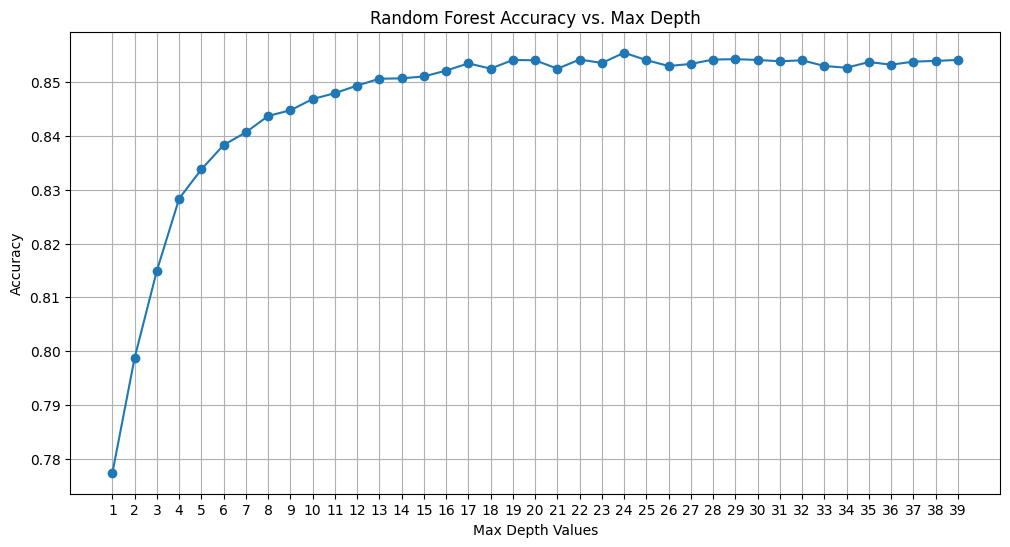

In [ ]:
#Visualize the accuracy for different values of max-depth
plt.figure(figsize=(12, 6))
plt.plot(max_depths, accuracies['Random Forest'], marker='o')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.xlabel('Max Depth Values')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

Best accuarcy is that max-depth = 24

In [ ]:
 rf = RandomForestClassifier(max_depth=24, random_state=42)
 rf.fit(X_train, y_train)
 y_pred = rf.predict(X_test)
 print(f"Max Depth: {24}, Accuracy: {accuracy_score(y_test, y_pred)}")


Max Depth: 24, Accuracy: 0.8554157414261041


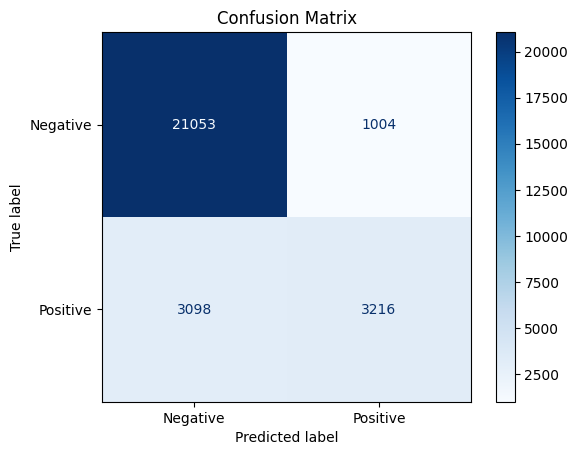

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

Adding metrics to metrics array

In [ ]:
metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()  # Convert to list for storage
    }

models_metrics.append(metrics)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

accuracies['Naive Bayes'] = []

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
accuracies['Naive Bayes'].append(accuracy_score(y_test, y_pred))

Accuracy: 0.8026153466567975


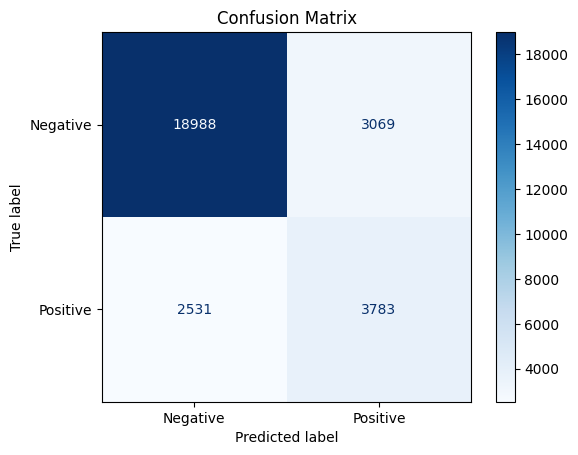

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

Adding metrics to metrics array

In [ ]:
metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()  # Convert to list for storage
    }

models_metrics.append(metrics)

### Comparing the accuracies of the models

In [ ]:
print(max_accuracies.keys(), max_accuracies.values())


dict_keys(['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']) dict_values(['Random Forest', 0.8413520848754009, 0.8387085404109831, 0.8554157414261041, 0.8026153466567975])


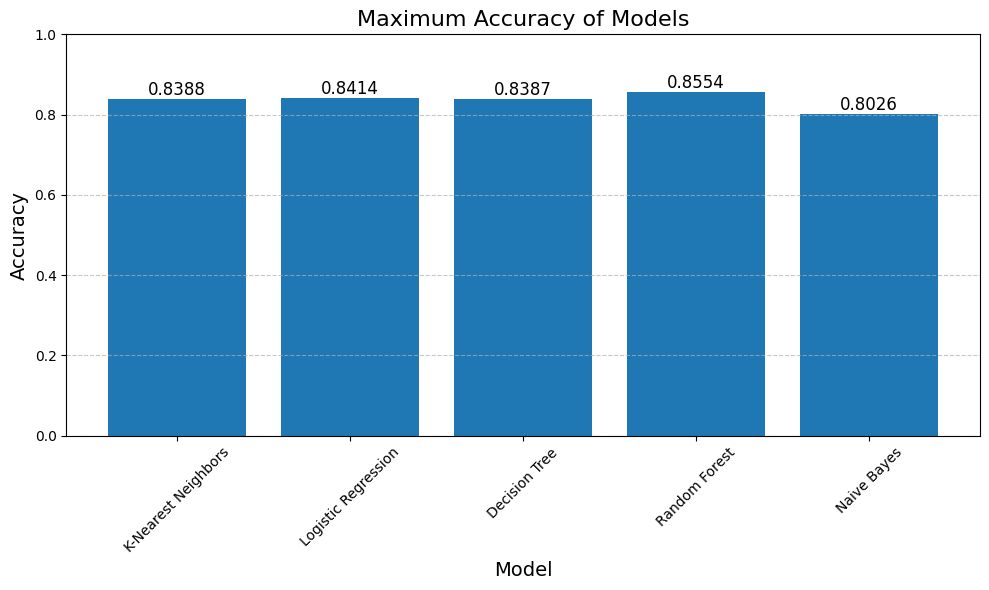

In [ ]:

# Calculate the maximum accuracy for each model
max_accuracies = {model: max(acc) for model, acc in accuracies.items()}


# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(max_accuracies.keys()  , max_accuracies.values())
plt.title('Maximum Accuracy of Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(max_accuracies.values()):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=12)
# Show the bar graph
plt.tight_layout()
plt.show()


Rainfall Prediction: Machine Learning Approach
Table of Contents
Introduction
Problem Definition
How Rain is Predicted Usually
Atmospheric Water Vapor
Cloud Formation Triggers
Weather Models
Human Expertise
Measurement Tools
Our Machine Learning Approach
Dataset Overview
Source & Acknowledgements
Feature Overview
Data Preprocessing
Missing Value Handling
Scaling / Normalization
Encoding Techniques
Model Selection and Evaluation
Choosing Best K-Value for K-NN Model
Confusion Matrix for K-NN Results
Confusion Matrix for Logistic Model Results
Choosing Best Max-Depth for Decision Tree Model
Confusion Matrix for Decision Tree Model Results
Choosing Best Max-Depth Value for Random Forest Model
Confusion Matrix for Random Forest Model Results
Confusion Matrix for Naïve Bayes Model Results
Accuracy Comparison
1. Introduction
The ability to predict rainfall accurately is vital for various sectors, including agriculture, disaster management, and urban planning. This report outlines a machine learning approach to predict whether it will rain the following day based on meteorological data collected from previous days.
2. Problem Definition
The central challenge addressed in this project is determining whether it will rain tomorrow based on various measurements and factors recorded from the previous day. The goal is to develop a model that can generalize well to unseen data and provide reliable predictions.
3. How Rain is Predicted Usually
Atmospheric Water Vapor
Atmospheric water vapor is a critical component in predicting rainfall, measured using precipitable water content to assess moisture availability in the atmosphere.
Cloud Formation Triggers
Meteorologists analyze cloud stability, height, and type (e.g., stratiform or convective) to predict rain likelihood, as these factors directly influence precipitation patterns.
Weather Models
Advanced weather models utilize satellite imagery and data from weather balloons to simulate atmospheric conditions and provide forecasts of precipitation.
Human Expertise
Local knowledge plays an essential role in refining predictions, especially during unpredictable weather events like thunderstorms, where human forecasters can make informed judgments based on experience.
Measurement Tools
Rainfall is recorded using various measurement tools, including traditional rain gauges and modern automated systems that provide real-time data.
4. Our Machine Learning Approach
This project leverages machine learning techniques to enhance rainfall prediction accuracy. By utilizing historical meteorological data, the model aims to identify patterns that can indicate future rainfall events. Although machine learning models may not achieve perfect accuracy, they significantly reduce the reliance on human expertise and traditional forecasting methods.
5. Dataset Overview
The dataset used in this analysis was collected from multiple weather stations across Australia and is publicly available through the Bureau of Meteorology's Climate Data Online platform. The dataset includes daily observations over several years, providing a comprehensive view of weather patterns.
6. Source & Acknowledgements
The observations were gathered from numerous weather stations operated by the Bureau of Meteorology, Australia’s national weather agency. Daily observations can be accessed online, allowing researchers and practitioners to analyze historical weather data effectively.
7. Feature Overview
All features in the dataset are pertinent to predicting rainfall, including:
Feature	Description
Date	The date of observation
Location	The weather station location
MinTemp	Minimum temperature recorded
MaxTemp	Maximum temperature recorded
Rainfall	Amount of rainfall measured
Evaporation	Evaporation rate
Sunshine	Hours of sunshine
WindGustDir	Direction of wind gusts
WindGustSpeed	Speed of wind gusts
WindDir9am	Wind direction at 9 AM
WindDir3pm	Wind direction at 3 PM
WindSpeed9am	Wind speed at 9 AM
WindSpeed3pm	Wind speed at 3 PM
Humidity9am	Humidity level at 9 AM
Humidity3pm	Humidity level at 3 PM
Pressure9am	Atmospheric pressure at 9 AM
Pressure3pm	Atmospheric pressure at 3 PM
Cloud9am	Cloud cover at 9 AM
Cloud3pm	Cloud cover at 3 PM
Temp9am	Temperature at 9 AM
Temp3pm	Temperature at 3 PM
RainToday	Indicator if it rained today (Yes/No)
RainTomorrow (Target)	Indicator if it will rain tomorrow (Yes/No)
8. Data Preprocessing
Missing Value Handling
Handling missing values is crucial for maintaining dataset integrity. Numerical missing values were replaced with their mean values, while categorical missing values were filled with the most frequently occurring value within that column. Rows with more than eight missing values were dropped from the dataset to ensure quality.
Scaling / Normalization
To ensure that numerical features are comparable and contribute equally to model training, all numerical values were normalized using MinMaxScaler, which scales features to a range between 0 and 1.
Encoding Techniques
Label Encoding was employed to convert categorical variables into a numerical format suitable for machine learning algorithms. This technique allows algorithms to interpret categorical data as numerical values while preserving the order among categories when applicable.
9. Model Selection and Evaluation
Choosing Best K-Value for K-NN Model
The K-Nearest Neighbors (K-NN) algorithm's performance was evaluated by testing various values of K (the number of neighbors). Cross-validation techniques were employed to determine which K-value yielded the highest accuracy without overfitting.
Confusion Matrix for K-NN Results
A confusion matrix was generated to visualize the performance of the K-NN model, showcasing true positives, false positives, true negatives, and false negatives.
Confusion Matrix for Logistic Model Results
Similarly, logistic regression results were assessed using a confusion matrix to evaluate classification performance against actual outcomes.
Choosing Best Max-Depth for Decision Tree Model
For the decision tree model, different maximum depth values were tested to find an optimal depth that balances bias and variance effectively.
Confusion Matrix for Decision Tree Model Results
The decision tree's performance was evaluated through its confusion matrix, providing insights into its predictive capabilities.
Choosing Best Max-Depth Value for Random Forest Model
In the random forest model, various max-depth values were analyzed to optimize tree depth while maintaining model robustness against overfitting.
Confusion Matrix for Random Forest Model Results
Confusion matrices were created for random forest results as well, allowing comparison with other models regarding their predictive accuracy.
Confusion Matrix for Naïve Bayes Model Results
Naïve Bayes model performance was similarly evaluated through confusion matrices to assess its effectiveness in predicting rainfall outcomes.
10. Accuracy Comparison
An overall accuracy comparison across different models was conducted to identify which approach yielded the best predictive performance in rainfall forecasting. The results indicated varying levels of accuracy among models:
K-NN: Achieved moderate accuracy but sensitive to outliers.
Logistic Regression: Provided good baseline performance.
Decision Tree: Showed potential but prone to overfitting with high max-depth.
Random Forest: Outperformed other models due to ensemble learning capabilities.
Naïve Bayes: Offered competitive results despite its simplicity.
This structured report provides an extensive overview of a machine learning approach to rainfall prediction, detailing methodologies employed in data handling, model selection processes, evaluation metrics used throughout the project, and insights drawn from comparative analyses across different predictive models.

Rainfall Prediction: Machine Learning Approach
Table of Contents
Introduction
Problem Definition
How Rain is Predicted Usually
Atmospheric Water Vapor
Cloud Formation Triggers
Weather Models
Human Expertise
Measurement Tools
Our Machine Learning Approach
Dataset Overview
Source & Acknowledgements
Feature Overview
Data Preprocessing
Missing Value Handling
Scaling / Normalization
Encoding Techniques
Model Selection and Evaluation
Choosing Best K-Value for K-NN Model
Confusion Matrix for K-NN Results
Confusion Matrix for Logistic Model Results
Choosing Best Max-Depth for Decision Tree Model
Confusion Matrix for Decision Tree Model Results
Choosing Best Max-Depth Value for Random Forest Model
Confusion Matrix for Random Forest Model Results
Confusion Matrix for Naïve Bayes Model Results
Accuracy Comparison
1. Introduction
This report presents a machine learning approach to predicting rainfall based on various meteorological factors collected from previous days.
2. Problem Definition
The primary objective is to detect whether it will rain tomorrow based on measurements and factors collected from the previous day.
3. How Rain is Predicted Usually
Atmospheric Water Vapor
Measured using precipitable water to determine moisture availability.
Cloud Formation Triggers
Analyzed for stability and height to predict rain type (e.g., stratiform or convective).
Weather Models
Utilize satellite imagery and weather balloon data to provide precipitation forecasts.
Human Expertise
Forecasters incorporate local knowledge to refine predictions, especially for thunderstorms.
Measurement Tools
Rainfall is recorded using gauges and modern automated systems.
4. Our Machine Learning Approach
This method highlights the potential of machine learning in weather prediction, demonstrating the ability to achieve respectable accuracy and reduce human effort in forecasting.
5. Dataset Overview
The dataset used was collected from several weather stations in Australia and is available on the official government website.
6. Source & Acknowledgements
Observations were gathered from multiple weather stations, with daily observations accessible through the Bureau of Meteorology's Climate Data Online.
7. Feature Overview
All features in the dataset are relevant to the target variable, "RainTomorrow," which indicates whether it will rain the next day.
Date	Location	MinTemp	MaxTemp	Rainfall	Evaporation
Sunshine	WindGustDir	WindGustSpeed	WindDir9am	WindDir3pm	WindSpeed9am
WindSpeed3pm	Humidity9am	Humidity3pm	Pressure9am	Pressure3pm	Cloud9am
Cloud3pm	Temp9am	Temp3pm	RainToday	RainTomorrow (Target)
8. Data Preprocessing
Missing Value Handling
Numerical missing values were replaced with their average, while categorical missing values were replaced with the most common value. Rows with over eight missing values were dropped.
Scaling / Normalization
Numerical values were normalized using MinMaxScaler to ensure they are within a specific range.
Encoding Techniques
Label Encoding was utilized to transform categorical variables into a numerical format that machine learning algorithms can process effectively.
9. Model Selection and Evaluation
Choosing Best K-Value for K-NN Model
An evaluation of different K-values was performed to determine the optimal parameter for the K-NN model.
Confusion Matrix for K-NN Results
Confusion matrices were generated to assess the performance of the K-NN model.
Confusion Matrix for Logistic Model Results
Similar evaluations were conducted for the logistic regression model.
Choosing Best Max-Depth for Decision Tree Model
The best max-depth parameter was identified for optimizing the decision tree model's performance.
Confusion Matrix for Decision Tree Model Results
Confusion matrices were analyzed to evaluate decision tree results.
Choosing Best Max-Depth Value for Random Forest Model
The optimal max-depth value was determined for enhancing random forest model accuracy.
Confusion Matrix for Random Forest Model Results
Results from the random forest model were evaluated using confusion matrices.
Confusion Matrix for Naïve Bayes Model Results
Performance metrics were also gathered from the Naïve Bayes model through confusion matrices.
10. Accuracy Comparison
An overall accuracy comparison across different models was conducted to identify which approach yielded the best predictive performance in rainfall forecasting.
This structured report provides a comprehensive overview of a machine learning approach to rainfall prediction, detailing methodologies, data handling techniques, and evaluation metrics used throughout the project.